In [1]:
! pip install awswrangler

In [2]:
import awswrangler as wr
import pandas as pd
from datetime import date

In [3]:
folder_dict={'2017':['06','07'],'2018':['02','03'],'2020':['06','07']}

month_map={'01':'January','02':'February','03':'March','04':"April",'05':'May','06':'June','07':'July',
           '08':'August','09':'September','10':'October','11':'November','12':'December'}

col_names = ["tagname",'timestamp','value']



In [4]:
# index = pd.date_range(start='2018-01-01', end='2020-04-27', periods=10, freq='D')
def fetch_data(variable):
    
    df_var = pd.DataFrame(columns=col_names[2:])
    
   
    
    for key,value in folder_dict.items():
         
        for month in value:
            print(variable,month)
            try:
                p = f's3://stmvpdata001/connacher-extract/Algar/{key}/{month}/{variable}_{month_map[month]}{key}.csv'
            
                df = wr.s3.read_csv(path=p,
                                    names=col_names,
                                    parse_dates=["timestamp"],
                                    low_memory = False # Hint to parse these columns as date instead of strings
                                    ).filter(['timestamp','value'])
            except:
                continue
            df['timestamp'] = pd.to_datetime(df['timestamp']) 
            df = df.set_index('timestamp')
            
            df['value'] = pd.to_numeric(df['value'], errors='coerce') 
            print(df.dtypes)
            df = df.resample('60Min').agg('mean')
            df_var = pd.concat([df_var, df]) 


    return {variable: df_var}

In [11]:
df_dict = {}
variables = ['SW0319.P875MB.INVOLTS','SW0319.PT87509.SCALED','SW0319.TT87509.SCALED']
from multiprocessing.pool import ThreadPool
pool=ThreadPool(2)
result = pool.map(fetch_data, (variable for variable in variables), 4)

SW0319.P875MB.INVOLTS 06
value    int64
dtype: object
SW0319.P875MB.INVOLTS 07
value    int64
dtype: object
SW0319.P875MB.INVOLTS 02
value    int64
dtype: object
SW0319.P875MB.INVOLTS 03
value    int64
dtype: object
SW0319.P875MB.INVOLTS 06
value    int64
dtype: object
SW0319.P875MB.INVOLTS 07
value    int64
dtype: object
SW0319.PT87509.SCALED 06
value    float64
dtype: object
SW0319.PT87509.SCALED 07
value    float64
dtype: object
SW0319.PT87509.SCALED 02
value    float64
dtype: object
SW0319.PT87509.SCALED 03
value    float64
dtype: object
SW0319.PT87509.SCALED 06
value    float64
dtype: object
SW0319.PT87509.SCALED 07
value    float64
dtype: object
SW0319.TT87509.SCALED 06
value    float64
dtype: object
SW0319.TT87509.SCALED 07
value    float64
dtype: object
SW0319.TT87509.SCALED 02
value    float64
dtype: object
SW0319.TT87509.SCALED 03
value    float64
dtype: object
SW0319.TT87509.SCALED 06
value    float64
dtype: object
SW0319.TT87509.SCALED 07
value    float64
dtype: object


In [12]:
for item in result:
    df_dict.update(item)

In [13]:
def line_plot(dataframe, span, title, time_column_name,interval, x_axis_name, y_axis_name):
  
    from matplotlib import style
    import matplotlib 
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.dates import DateFormatter
    

    style.use('classic')
    fig,ax = plt.subplots(figsize=(20,5))
    dataframe = dataframe.loc[span[0]:span[1]]
    plt.plot(dataframe['value'])  
    fig.patch.set_facecolor('xkcd:white')
    ax.set_facecolor('xkcd:white')
    date_form = DateFormatter("%m/%d")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    
    #   plt.plot(dataframe[tag_name])
    plt.title(title, fontsize=20, fontweight='bold')
    plt.xlabel(x_axis_name, fontsize=20, fontweight='bold')
    plt.ylabel(y_axis_name, fontsize=20, fontweight='bold')
    plt.show()

In [11]:
span = ['2018-06-1','2019-03-30']

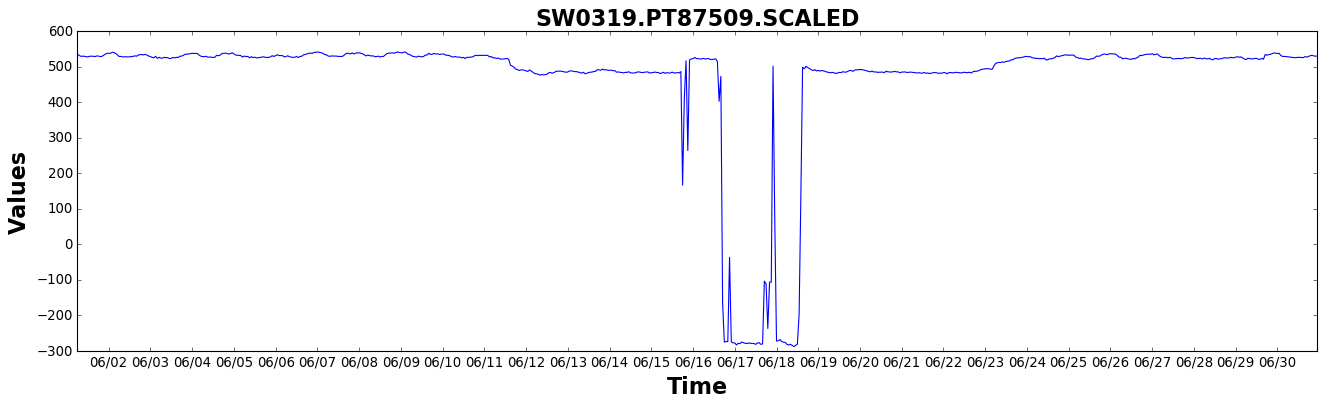

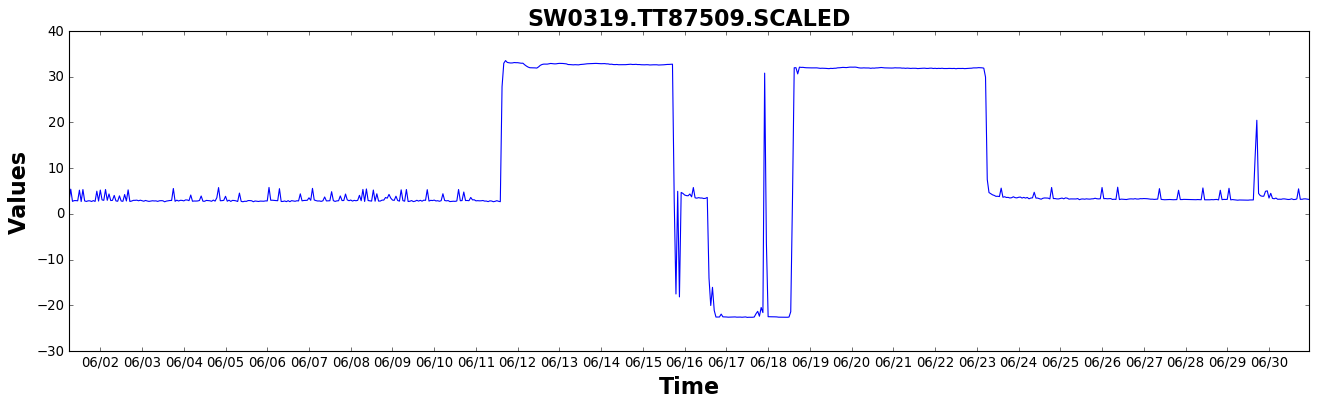

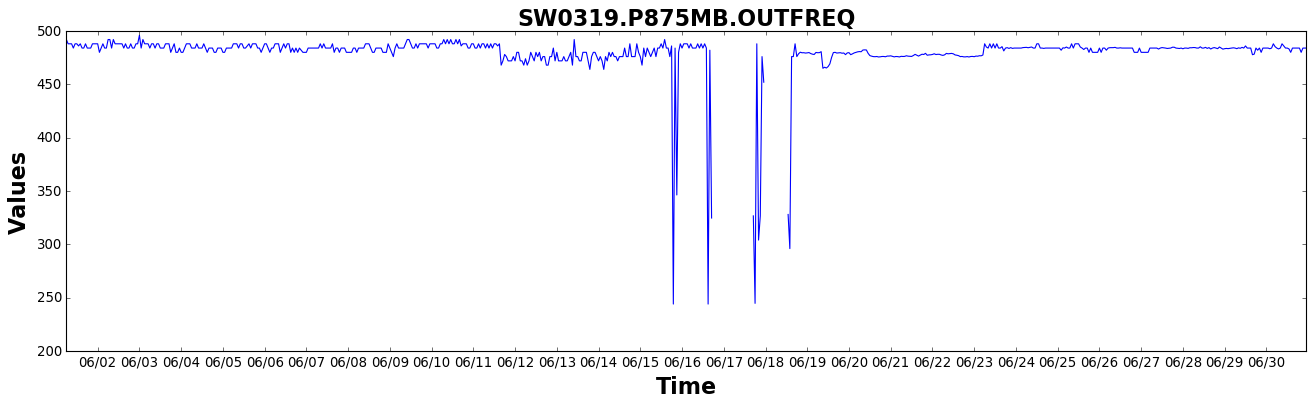

In [14]:
#15-06-2017 17:09	17-12-2017 23:15	20-06-2017 07:11	20-06-2017 07:29	
#Troubleshoot 3-19 Source Water Well .Take IR scans to assist in troubleshooting
#Failure visisble in all three V,P,T

line_plot(df_dict['SW0319.PT87509.SCALED'], ['2017-06-1','2017-06-30'], 'SW0319.PT87509.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['SW0319.TT87509.SCALED'], ['2017-06-1','2017-06-30'], 'SW0319.TT87509.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['SW0319.P875MB.INVOLTS'], ['2017-06-1','2017-06-30'], 'SW0319.P875MB.OUTFREQ', 'timestamp',1,'Time', 'Values')


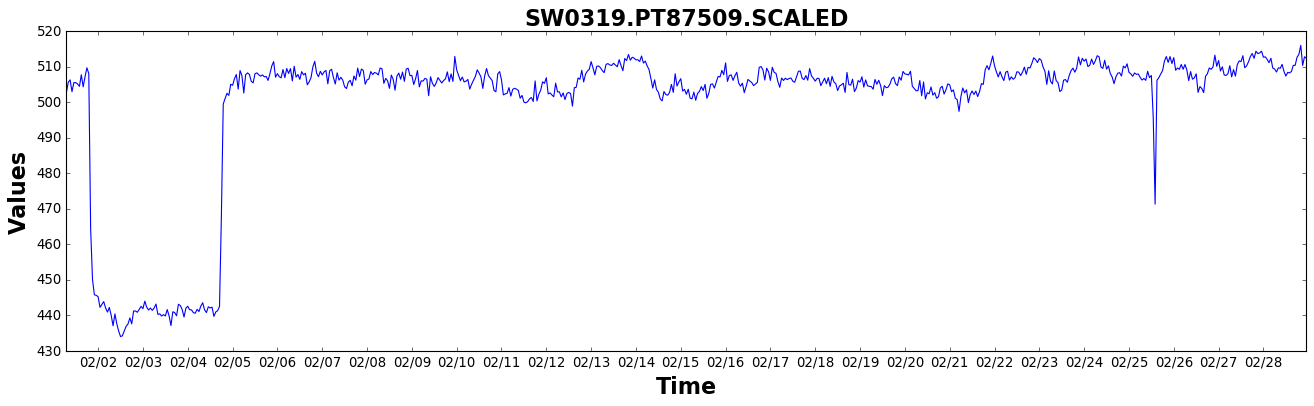

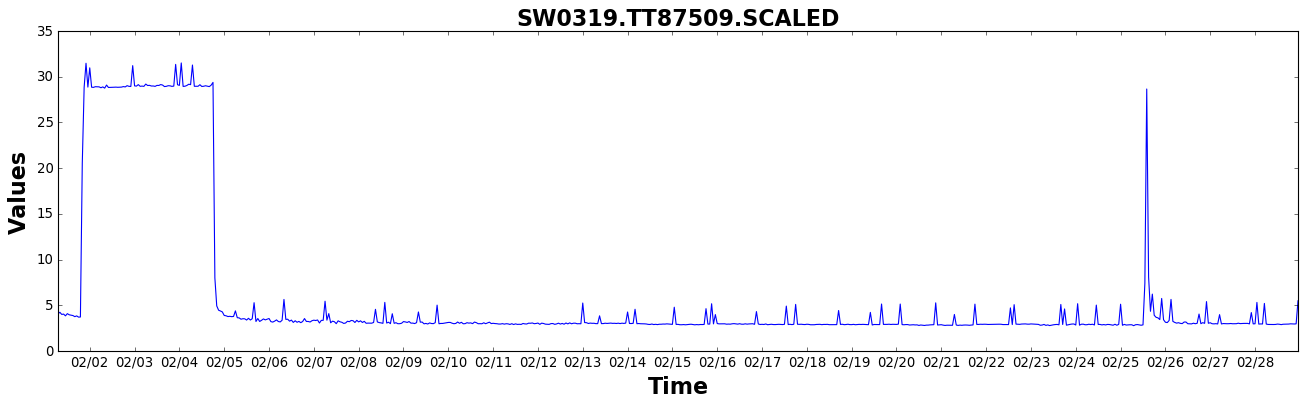

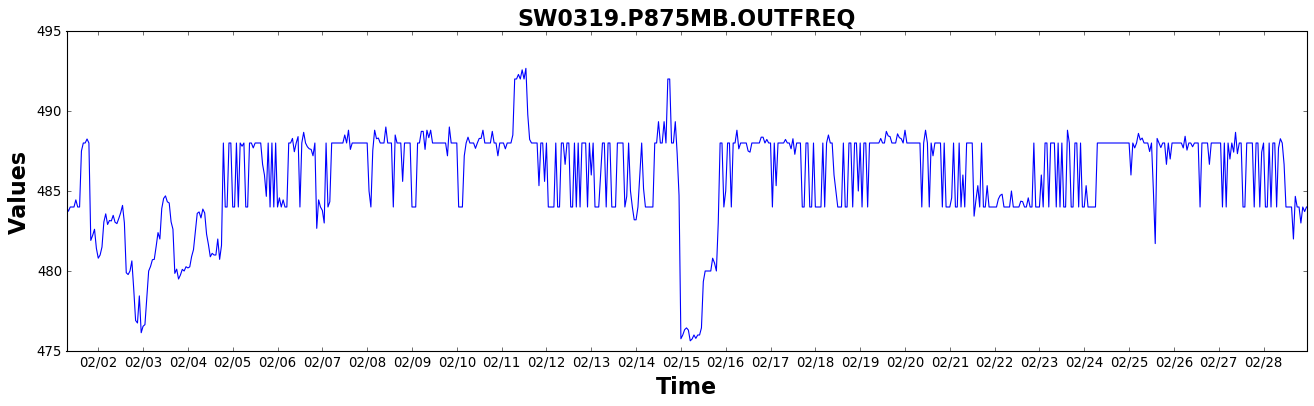

In [15]:
#25-02-2018 07:38	26-08-2018 23:15	27-02-2018 07:30	27-02-2018 09:29	
#Troubleshoot 4 of 19 WSW control panel freeze up issue
#Some sudden operational changes freezed the system 

line_plot(df_dict['SW0319.PT87509.SCALED'], ['2018-02-1','2018-02-28'], 'SW0319.PT87509.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['SW0319.TT87509.SCALED'], ['2018-02-1','2018-02-28'], 'SW0319.TT87509.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['SW0319.P875MB.INVOLTS'], ['2018-02-1','2018-02-28'], 'SW0319.P875MB.OUTFREQ', 'timestamp',1,'Time', 'Values')


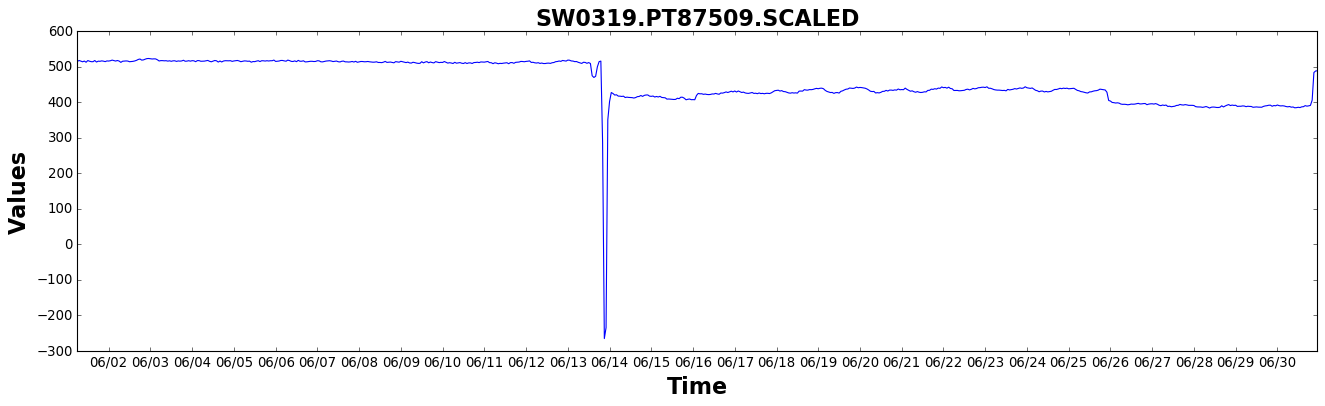

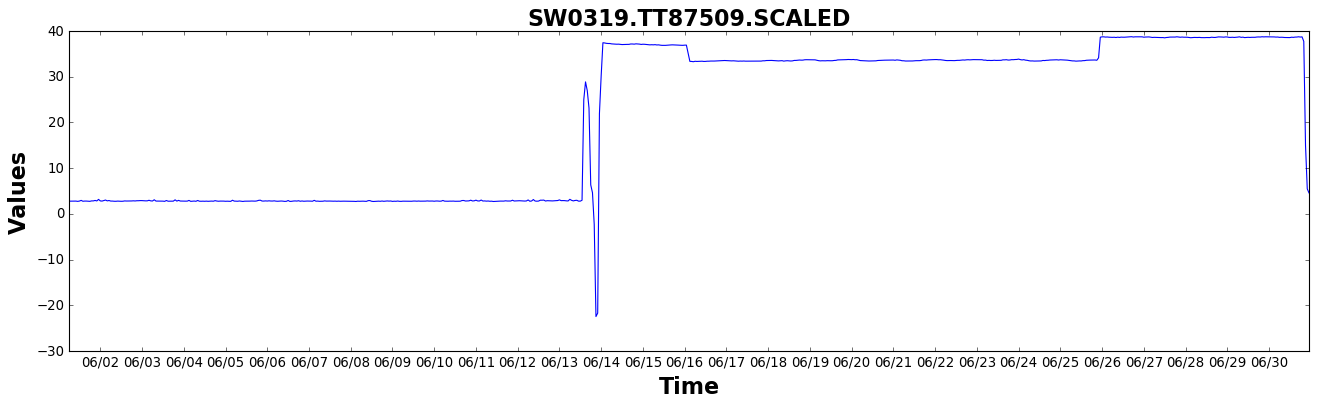

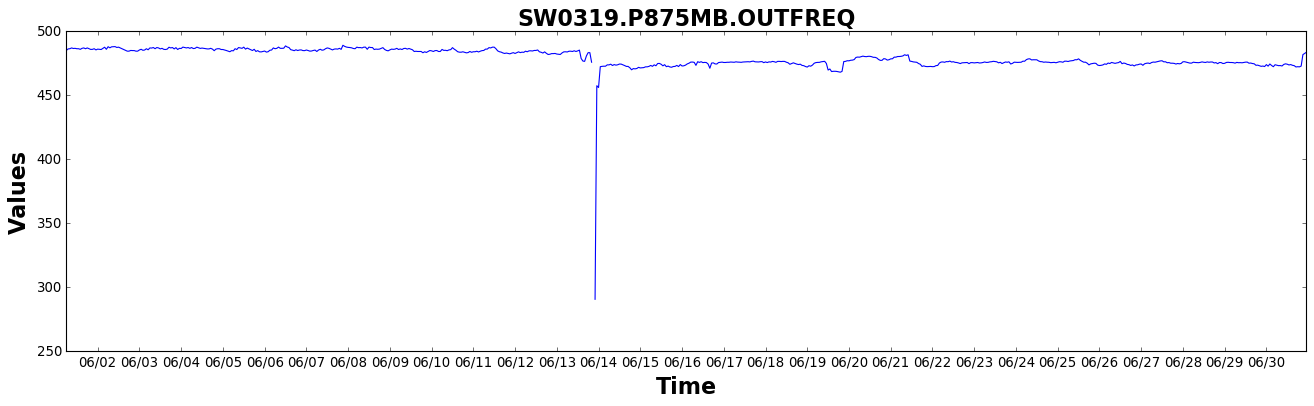

In [16]:
#14-06-2020 07:34	16-06-2020 09:27	16-06-2020 07:04	16-06-2020 09:27	16-06-2020 07:04	VFD at source water well 3 of 19 tripping.
#15-06-2020 08:34	17-06-2020 08:41	17-06-2020 06:53	17-06-2020 08:41	17-06-2020 06:53	Replace fuses and rear cooling fan on 4 of 19 WSW

#Failure visisble in V,P,T
line_plot(df_dict['SW0319.PT87509.SCALED'], ['2020-06-1','2020-06-30'], 'SW0319.PT87509.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['SW0319.TT87509.SCALED'], ['2020-06-1','2020-06-30'], 'SW0319.TT87509.SCALED', 'timestamp',1,'Time', 'Values')
line_plot(df_dict['SW0319.P875MB.INVOLTS'], ['2020-06-1','2020-06-30'], 'SW0319.P875MB.OUTFREQ', 'timestamp',1,'Time', 'Values')
